### Jaeger vs Kaiju Spans Timing ###

##### Uniform distribution #####
* 2000 _requests 
* _seed_ = "2000"
* _a_=0 _b_=500
* _Time Interval_ = 500

<p align="center"><img src="img/chronograf_5_1.png" alt="Chronograf"></p>
<p align="center"><img src="img/chronograf_5_2.png" alt="Chronograf"></p>

In [1]:
import matplotlib.pyplot as pyplot
import numpy as np

In [2]:
timing  = np.genfromtxt('csv/kaijuTiming_5.csv', delimiter=', ', dtype='str')
traceId = np.array(timing[0:,0])
spanId = np.array(timing[0:,1])
startTime = np.array(timing[0:,2]).astype(np.int64)
duration = np.array(timing[0:,3]).astype(np.int64)
eventTime = np.array(timing[0:,4]).astype(np.int64)
t_end_span = np.add(startTime, duration)
t_diff = np.subtract(eventTime, t_end_span)

j_timing  = np.genfromtxt('csv/jaegerTiming_5.csv', delimiter=', ', dtype='str')
j_traceId = np.array(j_timing[1:,0])
j_spanId = np.array(j_timing[1:,1])
j_startTime = np.array(j_timing[1:,2]).astype(np.int64)
j_duration = np.array(j_timing[1:,3]).astype(np.int64)
j_eventTime = np.array(j_timing[1:,4]).astype(np.int64)
j_t_end_span = np.add(j_startTime, j_duration)
j_t_diff = np.subtract(j_eventTime, j_t_end_span)

In [3]:
print("Kaiju Traces: " + str(np.unique(traceId).shape[0]))
print("Jaeger Traces: " + str(np.unique(j_traceId).shape[0]))
print("Traces in Kaiju and not in Jaeger " + str((np.setdiff1d(traceId, j_traceId).tolist())))
print("Traces in Jaeger and not in Kaiju " + str((np.setdiff1d(j_traceId, traceId).tolist())))
print("")
concat_traces_span = np.core.defchararray.add(np.core.defchararray.add(traceId, " "), spanId)
j_concat_traces_span = np.core.defchararray.add(np.core.defchararray.add(j_traceId, " "), j_spanId)
print("Kaiju Spans: " + str(np.unique(concat_traces_span).shape[0]))
print("Jaeger Spans: " + str(np.unique(j_concat_traces_span).shape[0]))
print("Spans (traceId spanId) in Kaiju and not in Jaeger " + str((np.setdiff1d(concat_traces_span, j_concat_traces_span).tolist())))
print("Spans (traceId spanId) in Jaeger and not in Kaiju " + str((np.setdiff1d(j_concat_traces_span, concat_traces_span).tolist())))

Kaiju Traces: 2000
Jaeger Traces: 2000
Traces in Kaiju and not in Jaeger []
Traces in Jaeger and not in Kaiju []

Kaiju Spans: 98176
Jaeger Spans: 98182
Spans (traceId spanId) in Kaiju and not in Jaeger ['1334227dfade9103 52b205f98ff8422f']
Spans (traceId spanId) in Jaeger and not in Kaiju ['24ffa32950d37b83 532149ebc2ccf658', '27de259c9a387160 4e7cb4511a206649', '51fcf7d0971218ad 76ffb446a1544b7c', '60507b6cb592154b 3f8e33fd4dca654d', '60ff8664f2cbbfd3 69c7236c2c75033f', '60ff8664f2cbbfd3 6bf79c994eda885d', 'd1bc0b63ed24066 73417ee6e64aba37']


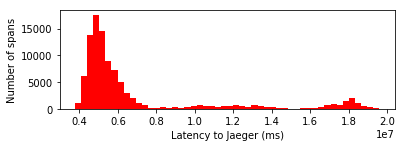

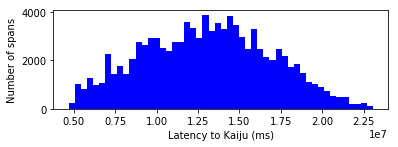

In [4]:
pyplot.subplot(2, 1, 1)
pyplot.hist(j_t_diff, 50, color='r')
pyplot.xlabel('Latency to Jaeger (ms)')
pyplot.ylabel('Number of spans')
pyplot.show()

pyplot.subplot(2, 1, 2)
pyplot.hist(t_diff, 50, color='b')
pyplot.xlabel('Latency to Kaiju (ms)')
pyplot.ylabel('Number of spans')
pyplot.show()

Max latency: Kaiju 19587461ms Jaeger 23047869ms
Min latency: Kaiju 3770538ms Jaeger 4694157ms


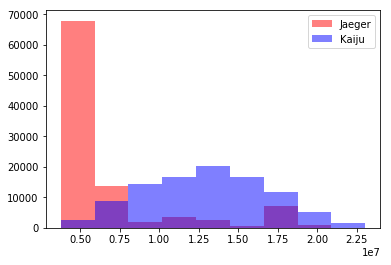

In [5]:
max_lat = np.amax(j_t_diff)
j_max_lat = np.amax(t_diff)
min_lat = np.amin(j_t_diff)
j_min_lat = np.amin(t_diff)
bins = np.linspace(min(min_lat, j_min_lat), max(max_lat, j_max_lat), 10)
print("Max latency: Kaiju " + str(max_lat) + "ms Jaeger " + str(j_max_lat) + "ms")
print("Min latency: Kaiju " + str(min_lat) + "ms Jaeger " + str(j_min_lat) + "ms")

pyplot.hist(j_t_diff, bins, alpha=0.5, label='Jaeger', color='r')
pyplot.hist(t_diff, bins, alpha=0.5, label='Kaiju', color='b')
pyplot.legend(loc='upper right')
pyplot.show()

In [6]:
traceIdinds = traceId.argsort()
sortedByTrace_traceId = traceId[traceIdinds[::-1]]
sortedByTrace_eventTime = eventTime[traceIdinds[::-1]]

traces = np.unique(sortedByTrace_traceId).tolist()
trace_firstSpan = np.zeros(len(traces), dtype='int64')
trace_lastSpan = np.zeros(len(traces), dtype='int64')
numSpansPerTrace = np.zeros(len(traces), dtype='int64')

t = 0
for trace in traces:
    i, = np.where(sortedByTrace_traceId == trace)
    sortedByTrace_eventTime_i = sortedByTrace_eventTime[i]
    sorted_sortedByTrace_eventTime_i = np.sort(sortedByTrace_eventTime_i)
    trace_firstSpan[t] = sorted_sortedByTrace_eventTime_i[0]
    trace_lastSpan[t] = sorted_sortedByTrace_eventTime_i[-1]
    numSpansPerTrace[t] = len(sortedByTrace_eventTime_i)
    t +=1
    
j_traceIdinds = j_traceId.argsort()
j_sortedByTrace_traceId = j_traceId[j_traceIdinds[::-1]]
j_sortedByTrace_eventTime = j_eventTime[j_traceIdinds[::-1]]

j_traces = np.unique(j_sortedByTrace_traceId).tolist()
j_trace_firstSpan = np.zeros(len(j_traces), dtype='int64')
j_trace_lastSpan = np.zeros(len(j_traces), dtype='int64')
j_numSpansPerTrace = np.zeros(len(j_traces), dtype='int64')

j_t = 0
for trace in j_traces:
    i, = np.where(j_sortedByTrace_traceId == trace)
    j_sortedByTrace_eventTime_i = j_sortedByTrace_eventTime[i]
    j_sorted_sortedByTrace_eventTime_i = np.sort(j_sortedByTrace_eventTime_i)
    j_trace_firstSpan[j_t] = j_sorted_sortedByTrace_eventTime_i[0]
    j_trace_lastSpan[j_t] = j_sorted_sortedByTrace_eventTime_i[-1]
    j_numSpansPerTrace[j_t] = len(j_sortedByTrace_eventTime_i)
    j_t +=1

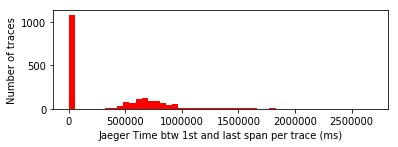

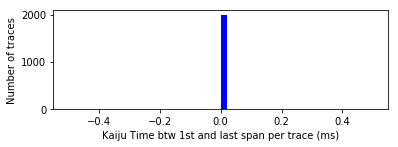

In [7]:
pyplot.subplot(2, 1, 1)
j_t_diff_per_trace = np.subtract(j_trace_lastSpan, j_trace_firstSpan)
pyplot.hist(j_t_diff_per_trace, 50, color='r')
pyplot.xlabel('Jaeger Time btw 1st and last span per trace (ms)')
pyplot.ylabel('Number of traces')
pyplot.show()

pyplot.subplot(2, 1, 2)
t_diff_per_trace = np.subtract(trace_lastSpan, trace_firstSpan)
pyplot.hist(t_diff_per_trace, 50, color='b')
pyplot.xlabel('Kaiju Time btw 1st and last span per trace (ms)')
pyplot.ylabel('Number of traces')
pyplot.show()

#Jaeger all spans of a trace almost together but higher latencies, notice also exceptions (high timestamps)

Max diff 1st-last: Kaiju 0ms Jaeger 2687800ms
Min diff 1st-last: Kaiju 0ms Jaeger 0ms


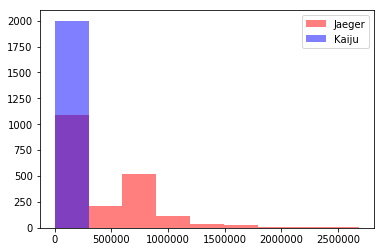

In [8]:
max_lat = np.amax(t_diff_per_trace)
j_max_lat = np.amax(j_t_diff_per_trace)
min_lat = np.amin(t_diff_per_trace)
j_min_lat = np.amin(j_t_diff_per_trace)
bins = np.linspace(min(min_lat, j_min_lat), max(max_lat, j_max_lat), 10)
print("Max diff 1st-last: Kaiju " + str(max_lat) + "ms Jaeger " + str(j_max_lat) + "ms")
print("Min diff 1st-last: Kaiju " + str(min_lat) + "ms Jaeger " + str(j_min_lat) + "ms")

pyplot.hist(j_t_diff_per_trace, bins, alpha=0.5, label='Jaeger', color='r')
pyplot.hist(t_diff_per_trace, bins, alpha=0.5, label='Kaiju', color='b')
pyplot.legend(loc='upper right')
pyplot.show()

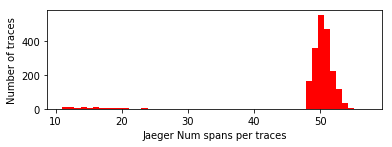

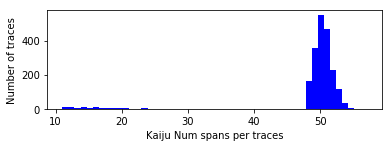

In [9]:
pyplot.subplot(2, 1, 1)
pyplot.hist(j_numSpansPerTrace, 50, color='r')
pyplot.xlabel('Jaeger Num spans per traces')
pyplot.ylabel('Number of traces')
pyplot.show()

pyplot.subplot(2, 1, 2)
pyplot.hist(numSpansPerTrace, 50, color='b')
pyplot.xlabel('Kaiju Num spans per traces')
pyplot.ylabel('Number of traces')
pyplot.show()